
# CLUSTERING ASSIGNMENT



# THEORETICAL

#1. What is unsupervised learning in the context of machine learning?
Unsupervised learning is a type of machine learning where the algorithm learns patterns from unlabeled data (no predefined output labels). The goal is to discover hidden structures, such as clusters, associations, or dimensionality reduction, without explicit supervision.

#2. How does the K-Means clustering algorithm work?
K-Means works as follows:

Initialize: Randomly select K centroids (cluster centers).

Assign: Assign each data point to the nearest centroid, forming K clusters.

Update: Recalculate centroids as the mean of all points in each cluster.

Repeat: Steps 2–3 until centroids stabilize (convergence).

#3. Explain the concept of a dendrogram in hierarchical clustering.
A dendrogram is a tree-like diagram that records the sequence of merges (agglomerative) or splits (divisive) in hierarchical clustering. The vertical axis represents distance or dissimilarity, showing how clusters are merged hierarchically.

#4. What is the main difference between K-Means and Hierarchical Clustering?
K-Means: Requires predefined K (number of clusters), partitions data into non-overlapping clusters.

Hierarchical: Builds a hierarchy of clusters (dendrogram), doesn’t require K upfront, and can produce nested clusters.

#5. What are the advantages of DBSCAN over K-Means?
No need for K: Discovers clusters based on density.

Handles noise: Identifies outliers as noise points.

Arbitrary shapes: Captures non-spherical clusters, unlike K-Means.

#6. When would you use Silhouette Score in clustering?
To evaluate cluster quality when ground truth labels are unavailable. It measures how well-separated clusters are (higher score = better separation). Useful for comparing different clustering results or choosing K.

#7. What are the limitations of Hierarchical Clustering?
Computationally expensive (O(n³) for agglomerative).

Sensitive to noise/outliers.

Once formed, clusters cannot be undone (rigid hierarchy).

#8. Why is feature scaling important in clustering algorithms like K-Means?
K-Means uses distance metrics (e.g., Euclidean). If features are on different scales, larger-scaled features dominate distances, leading to biased clusters. Scaling ensures equal contribution.

#9. How does DBSCAN identify noise points?
Points that:

Are not part of any core point’s neighborhood.

Have fewer than min_samples neighbors within ε (eps).

#10. Define inertia in the context of K-Means.
Inertia is the sum of squared distances of data points to their nearest centroid. Lower inertia = tighter clusters. Used to evaluate K-Means performance (but has limitations).

#11. What is the elbow method in K-Means clustering?
A technique to choose the optimal K by plotting inertia against K and selecting the "elbow" point (where inertia starts decreasing linearly).

#12. Describe the concept of "density" in DBSCAN.
Density is defined by two parameters:

ε (eps): Radius of the neighborhood.

min_samples: Minimum points within ε to form a dense region.
A cluster is a maximal set of density-connected points.

#13. Can hierarchical clustering be used on categorical data?
Yes, but distance metrics must be adapted (e.g., Gower distance for mixed data). For pure categorical data, metrics like Hamming distance or Jaccard similarity are used.

#14. What does a negative Silhouette Score indicate?
Negative scores suggest poor clustering (points are closer to other clusters than their own). Scores near 0 indicate overlapping clusters.

#15. Explain the term "linkage criteria" in hierarchical clustering.
Defines how distances between clusters are computed during merging. Common methods:

Single linkage: Minimum distance between clusters.

Complete linkage: Maximum distance.

Average linkage: Mean distance.

Ward’s method: Minimizes variance.

#16. Why might K-Means perform poorly on data with varying cluster sizes or densities?
Assumes spherical clusters of similar size/density.

Centroids may be biased toward larger/denser clusters.

Struggles with irregular shapes.



#17. What are the core parameters in DBSCAN, and how do they influence clustering?
eps (ε): Larger ε = fewer, larger clusters.

min_samples: Higher values = more points needed to form a cluster, reducing noise sensitivity.

#18. How does K-Means++ improve upon standard K-Means initialization?
Smart centroid seeding: Chooses initial centroids far apart, reducing randomness and improving convergence speed/final results.

#19. What is agglomerative clustering?
A bottom-up hierarchical clustering method where each point starts as its own cluster, and pairs are merged iteratively based on linkage criteria.

#20. What makes Silhouette Score a better metric than just inertia for model evaluation?
Inertia: Always decreases as K increases (hard to interpret).

Silhouette Score:

Measures both cohesion (intra-cluster) and separation (inter-cluster).

Works for any distance metric.

Values are normalized (-1 to 1), making comparisons easier.

# PRACTICAL QUESTION

#21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using ascatter plot.

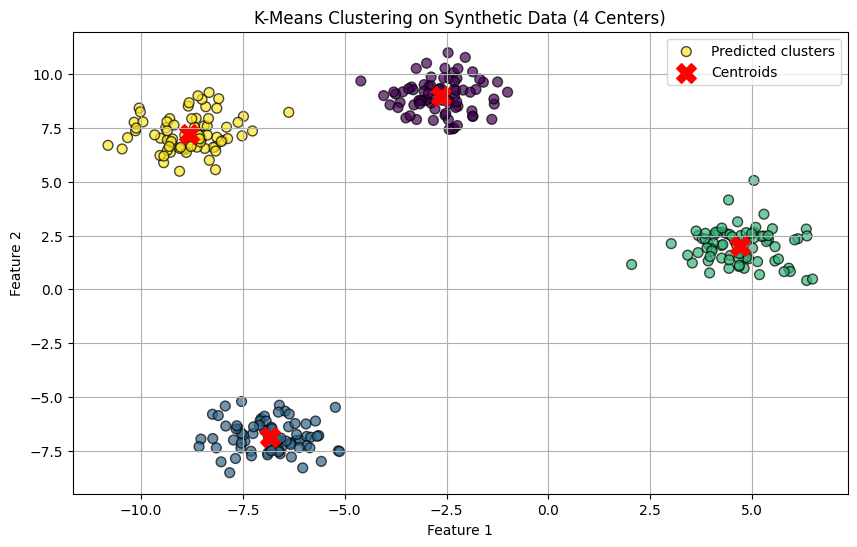

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate synthetic data with 4 centers
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.8, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# 3. Visualize the results
plt.figure(figsize=(10, 6))

# Plot true clusters (if available)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis',
            s=50, alpha=0.7, edgecolor='k', label='Predicted clusters')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',
            marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering on Synthetic Data (4 Centers)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# 22.  Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target

# Standardize the features (important for distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_pred = agg_clustering.fit_predict(X_scaled)  # Note: Using scaled data

# Display first 10 predicted labels
print("First 10 predicted cluster labels:")
print(y_pred[:10])

# For comparison, show first 10 true labels (species)
print("\nFirst 10 true labels (for reference):")
print(y_true[:10])

First 10 predicted cluster labels:
[1 1 1 1 1 1 1 1 1 1]

First 10 true labels (for reference):
[0 0 0 0 0 0 0 0 0 0]


# 23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

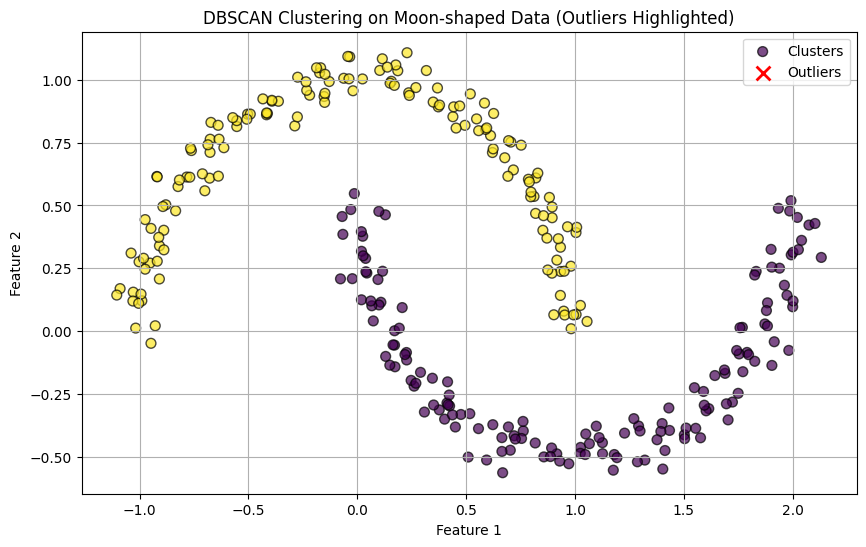

Number of clusters found: 2
Number of outliers found: 0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate synthetic moon-shaped data
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

# 2. Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_pred = dbscan.fit_predict(X)

# 3. Identify outliers (points labeled as -1 by DBSCAN)
outliers = X[y_pred == -1]

# 4. Visualize the results
plt.figure(figsize=(10, 6))

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis',
            s=50, alpha=0.7, edgecolor='k', label='Clusters')

# Highlight outliers in red
plt.scatter(outliers[:, 0], outliers[:, 1], c='red',
            marker='x', s=100, linewidth=2, label='Outliers')

plt.title('DBSCAN Clustering on Moon-shaped Data (Outliers Highlighted)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Print number of clusters and outliers
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
print(f"Number of clusters found: {n_clusters}")
print(f"Number of outliers found: {len(outliers)}")

# 24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.

In [4]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = wine.data
feature_names = wine.feature_names
target_names = wine.target_names

# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 3 clusters (matching wine classes)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Calculate and print cluster sizes
cluster_sizes = np.bincount(labels)
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i}: {size} samples")

# Optional: Compare with actual wine classes
print("\nActual wine class distribution:")
print(np.bincount(wine.target))

Cluster sizes:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples

Actual wine class distribution:
[59 71 48]


# 25.Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

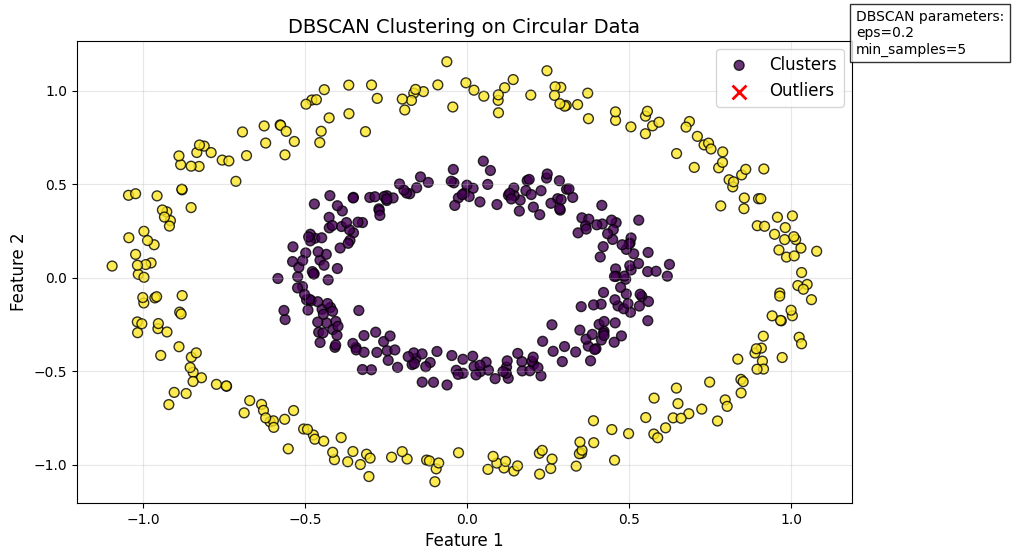

Number of clusters found: 2
Number of outliers found: 0
Cluster distribution: [250 250]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate synthetic circular data
X, y_true = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

# 2. Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_pred = dbscan.fit_predict(X)

# 3. Identify outliers (points labeled as -1 by DBSCAN)
outliers = X[y_pred == -1]
core_samples = X[y_pred != -1]
core_labels = y_pred[y_pred != -1]

# 4. Visualize the results
plt.figure(figsize=(10, 6))

# Plot core points (clustered)
plt.scatter(core_samples[:, 0], core_samples[:, 1], c=core_labels,
            cmap='viridis', s=50, alpha=0.8, edgecolor='k', label='Clusters')

# Highlight outliers in red
plt.scatter(outliers[:, 0], outliers[:, 1], c='red',
            marker='x', s=100, linewidth=2, label='Outliers')

plt.title('DBSCAN Clustering on Circular Data', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add text box with DBSCAN parameters
textstr = f'DBSCAN parameters:\neps=0.2\nmin_samples=5'
plt.text(1.2, 1.2, textstr, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# Print clustering results
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
print(f"Number of clusters found: {n_clusters}")
print(f"Number of outliers found: {len(outliers)}")
print(f"Cluster distribution: {np.bincount(y_pred[y_pred != -1])}")

# 26.  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
feature_names = data.feature_names
target = data.target

# Apply MinMax scaling (normalize features to [0,1] range)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Get cluster centroids and display them
centroids = kmeans.cluster_centers_

# Create a DataFrame for better visualization
centroids_df = pd.DataFrame(centroids, columns=feature_names)
print("Cluster Centroids (after MinMax scaling):")
print(centroids_df)

# Compare with actual class means (optional)
print("\nActual Class Means (for reference):")
print(pd.DataFrame(scaler.transform(X), columns=feature_names)
      .groupby(target).mean())

Cluster Centroids (after MinMax scaling):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst f

#27.  Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.

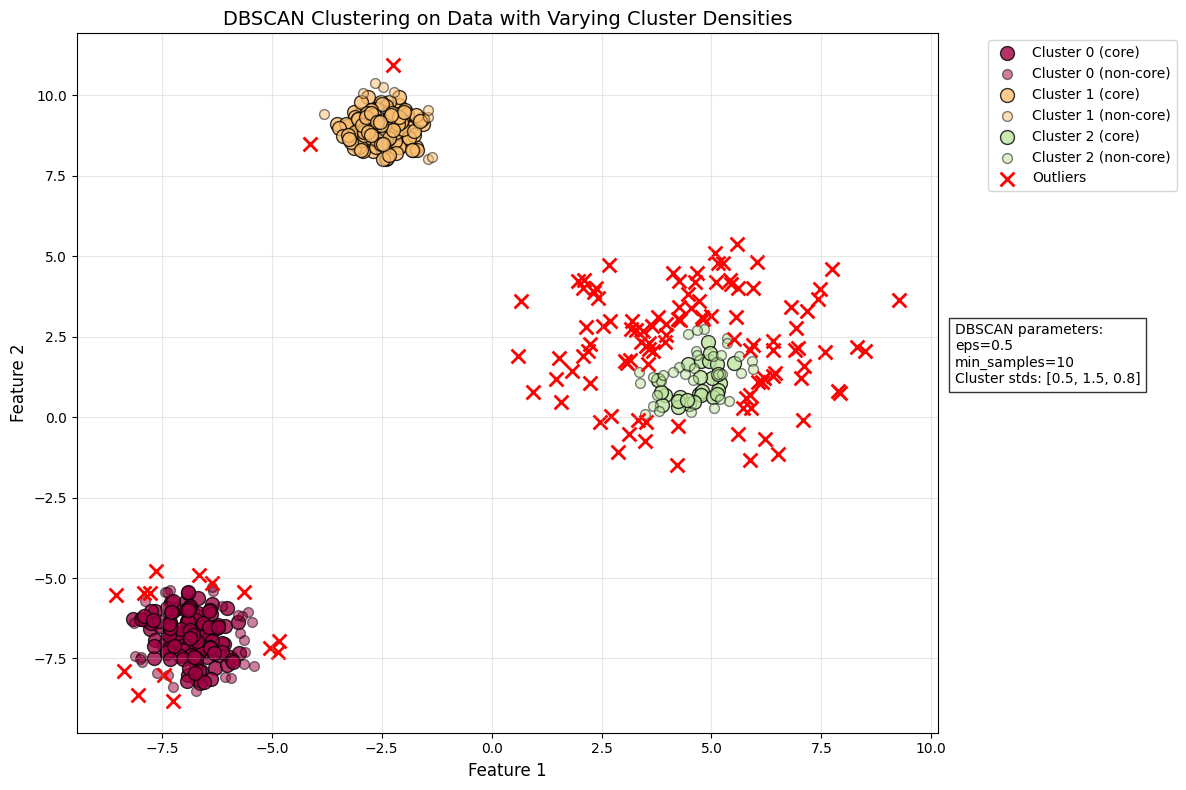

Number of clusters found: 3
Number of outliers found: 123
Points per cluster: [152 165  60]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate synthetic data with varying cluster stds
X, y_true = make_blobs(n_samples=500,
                       centers=3,
                       cluster_std=[0.5, 1.5, 0.8],  # Different std for each cluster
                       random_state=42)

# 2. Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
y_pred = dbscan.fit_predict(X)

# 3. Identify core points and outliers
core_samples_mask = np.zeros_like(y_pred, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
outliers_mask = y_pred == -1

# 4. Visualize the results
plt.figure(figsize=(12, 8))

# Plot core points (clustered)
unique_labels = set(y_pred)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Skip outliers (handled separately)
        continue

    class_member_mask = (y_pred == k)

    # Plot core points
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col],
                s=100, edgecolor='k', alpha=0.8,
                label=f'Cluster {k} (core)')

    # Plot non-core points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col],
                s=50, edgecolor='k', alpha=0.5,
                label=f'Cluster {k} (non-core)')

# Highlight outliers in red
plt.scatter(X[outliers_mask, 0], X[outliers_mask, 1],
            c='red', marker='x', s=100, linewidth=2,
            label='Outliers')

plt.title('DBSCAN Clustering on Data with Varying Cluster Densities', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add text box with parameters
textstr = '\n'.join((
    f'DBSCAN parameters:',
    f'eps=0.5',
    f'min_samples=10',
    f'Cluster stds: [0.5, 1.5, 0.8]'))
plt.text(1.02, 0.5, textstr, transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print clustering results
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
n_noise = list(y_pred).count(-1)
print(f"Number of clusters found: {n_clusters}")
print(f"Number of outliers found: {n_noise}")
print(f"Points per cluster: {np.bincount(y_pred[y_pred != -1])}")

#28.  Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

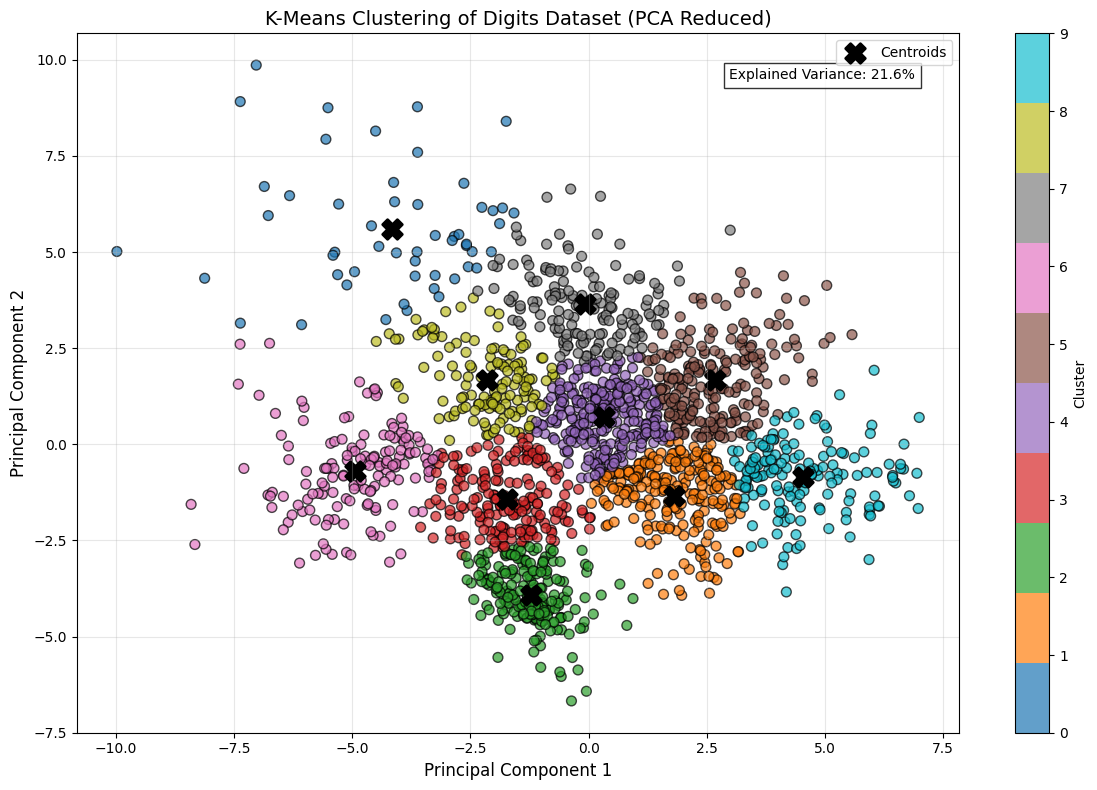

Cluster sizes:
[ 53 235 208 192 285 222 150 153 136 163]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering (10 clusters for 10 digits)
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Create the visualization
plt.figure(figsize=(12, 8))

# Plot each cluster with different colors
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=clusters, cmap='tab10',
                     s=50, alpha=0.7, edgecolor='k')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            c='black', marker='X', s=200,
            alpha=1.0, linewidth=2, label='Centroids')

# Add labels and title
plt.title('K-Means Clustering of Digits Dataset (PCA Reduced)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.legend()

# Add explained variance ratio
explained_var = pca.explained_variance_ratio_.sum() * 100
plt.text(0.95, 0.95,
         f'Explained Variance: {explained_var:.1f}%',
         transform=plt.gca().transAxes,
         ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print cluster sizes
print("Cluster sizes:")
print(np.bincount(clusters))

# 29.Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

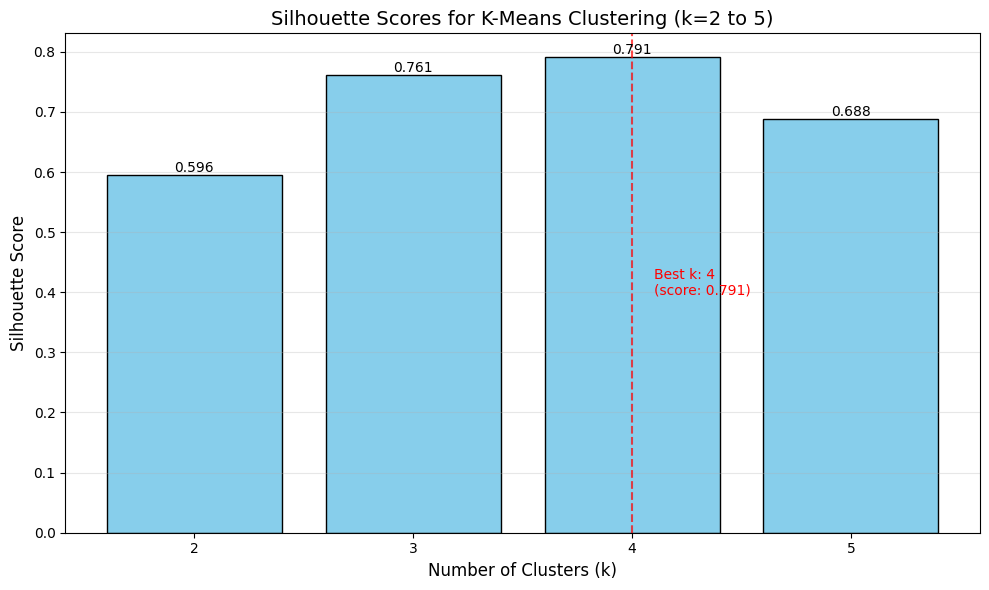

Silhouette Scores:
k = 2: 0.596
k = 3: 0.761
k = 4: 0.791
k = 5: 0.688


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# 2. Evaluate silhouette scores for k=2 to 5
k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# 3. Create bar chart visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(k_values, silhouette_scores, color='skyblue', edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.title('Silhouette Scores for K-Means Clustering (k=2 to 5)', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(k_values)
plt.grid(axis='y', alpha=0.3)

# Highlight the best score
best_k = k_values[np.argmax(silhouette_scores)]
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7)
plt.text(best_k+0.1, max(silhouette_scores)/2,
         f'Best k: {best_k}\n(score: {max(silhouette_scores):.3f})',
         color='red')

plt.tight_layout()
plt.show()

# Print the results
print("Silhouette Scores:")
for k, score in zip(k_values, silhouette_scores):
    print(f"k = {k}: {score:.3f}")

#30.Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

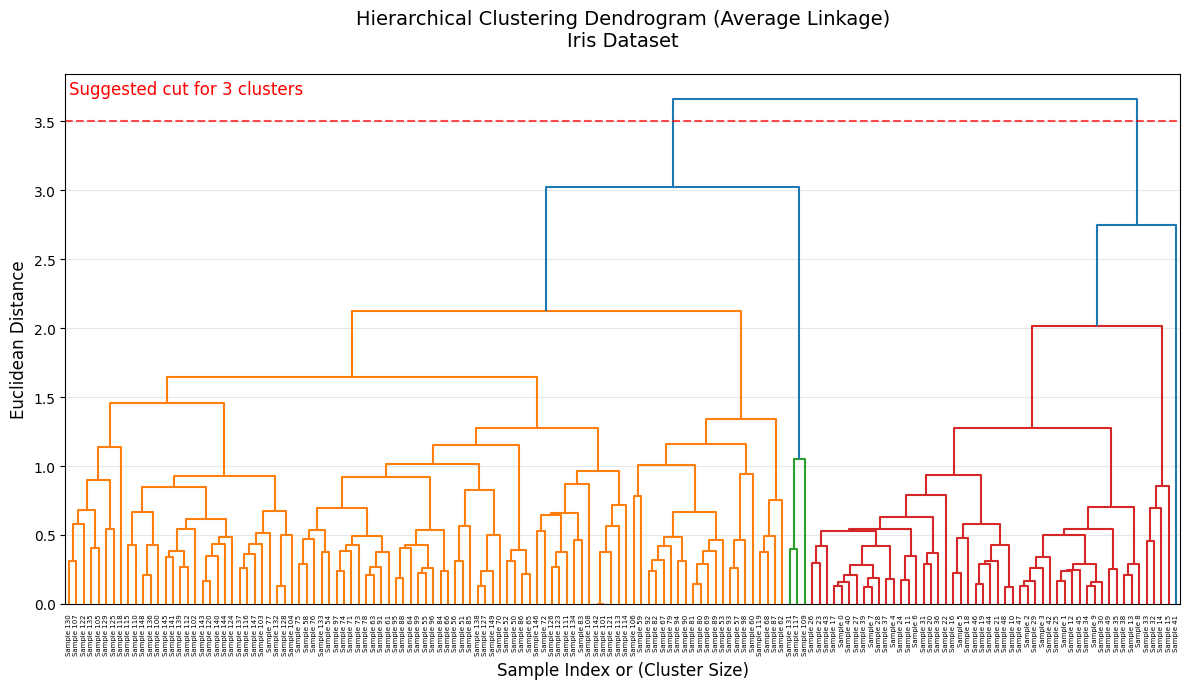


Actual Iris Species Distribution:
[50 50 50]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load and prepare the Iris dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
target_names = iris.target_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering with average linkage
Z = linkage(X_scaled, method='average', metric='euclidean')

# Create the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(Z,
           orientation='top',
           labels=[f"Sample {i}" for i in range(len(X))],
           distance_sort='descending',
           show_leaf_counts=True)

# Add titles and labels
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)\nIris Dataset',
          fontsize=14, pad=20)
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)

# Add horizontal line for cluster count suggestion
plt.axhline(y=3.5, color='r', linestyle='--', alpha=0.7)
plt.text(5, 3.7, 'Suggested cut for 3 clusters', color='red', fontsize=12)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Compare with actual species
print("\nActual Iris Species Distribution:")
print(np.bincount(iris.target))

# 31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.

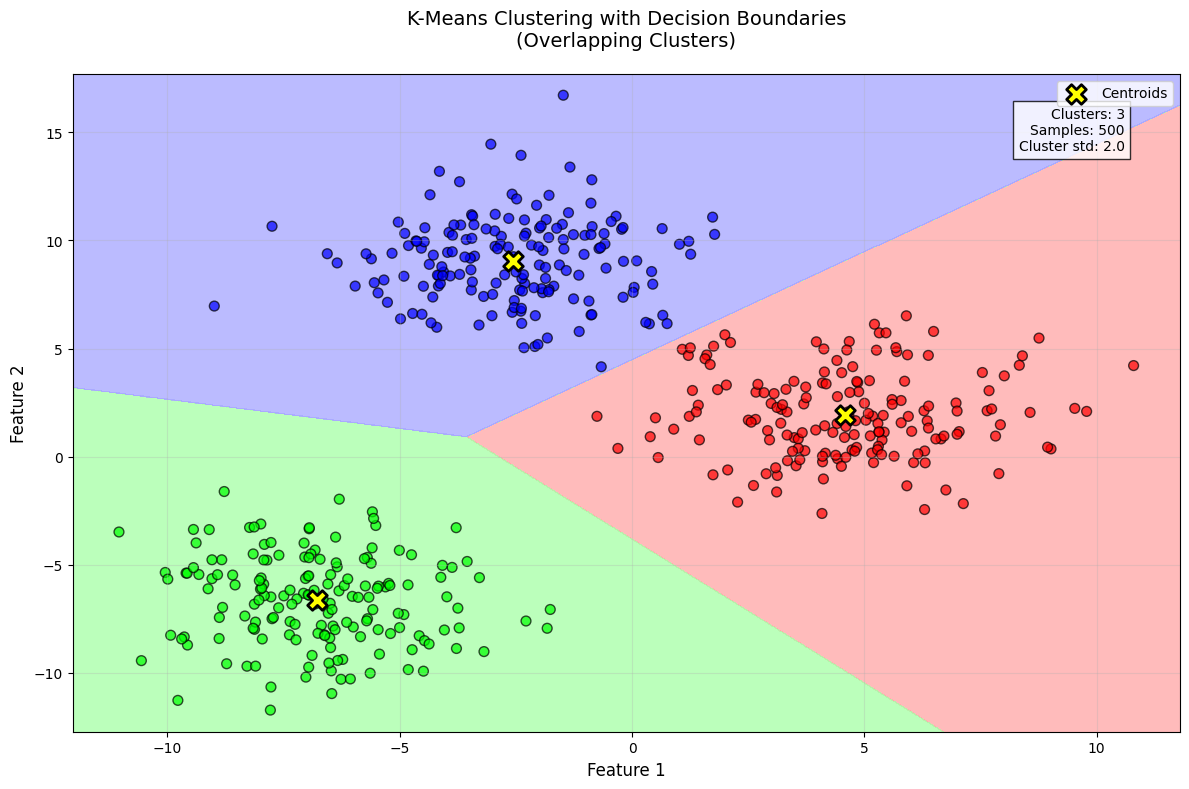

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate overlapping synthetic data
X, y = make_blobs(n_samples=500,
                  centers=3,
                  cluster_std=2.0,  # Higher std creates more overlap
                  random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
centroids = kmeans.cluster_centers_

# 3. Create meshgrid for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict clusters for meshgrid points
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. Create visualization
plt.figure(figsize=(12, 8))

# Create custom colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot decision boundaries
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cmap_bold,
            s=50, edgecolor='k', alpha=0.7)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow',
            marker='X', s=200, edgecolor='k', linewidth=2,
            label='Centroids')

# Add labels and title
plt.title('K-Means Clustering with Decision Boundaries\n(Overlapping Clusters)',
          fontsize=14, pad=20)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()

# Add text box with parameters
textstr = '\n'.join((
    f'Clusters: 3',
    f'Samples: 500',
    f'Cluster std: 2.0'))
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
         ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

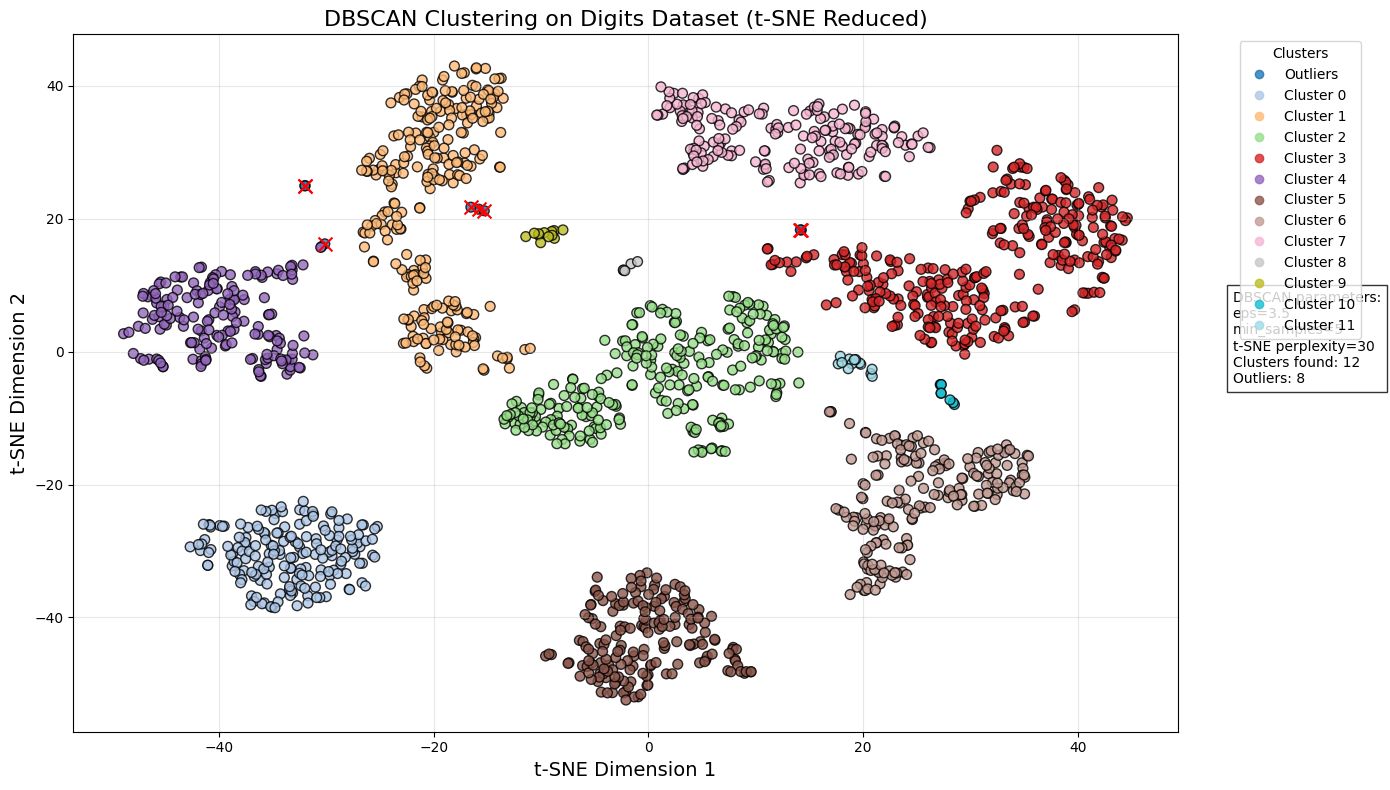

Cluster distribution:
[  8 178 269 264 309 172 183 194 182   5  12   8  13]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # True labels (for reference)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3.5, min_samples=5)
clusters = dbscan.fit_predict(X_tsne)

# Create visualization
plt.figure(figsize=(14, 8))

# Create scatter plot (colored by cluster)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
                     c=clusters, cmap='tab20',
                     s=50, alpha=0.8, edgecolor='k')

# Highlight outliers (cluster = -1)
outliers = X_tsne[clusters == -1]
plt.scatter(outliers[:, 0], outliers[:, 1],
            c='red', marker='x', s=100,
            linewidth=1.5, label='Outliers')

# Add labels and title
plt.title('DBSCAN Clustering on Digits Dataset (t-SNE Reduced)', fontsize=16)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)

# Create legend for clusters
unique_clusters = np.unique(clusters)
legend_labels = [f'Cluster {c}' if c != -1 else 'Outliers'
                for c in unique_clusters]
plt.legend(handles=scatter.legend_elements()[0],
           labels=legend_labels,
           title='Clusters',
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

# Add text box with parameters
textstr = '\n'.join((
    f'DBSCAN parameters:',
    f'eps=3.5',
    f'min_samples=5',
    f't-SNE perplexity=30',
    f'Clusters found: {len(np.unique(clusters))-1}',
    f'Outliers: {np.sum(clusters == -1)}'))
plt.text(1.05, 0.5, textstr, transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print cluster statistics
print("Cluster distribution:")
print(np.bincount(clusters + 1))  # Shift to avoid negative index

# 33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.

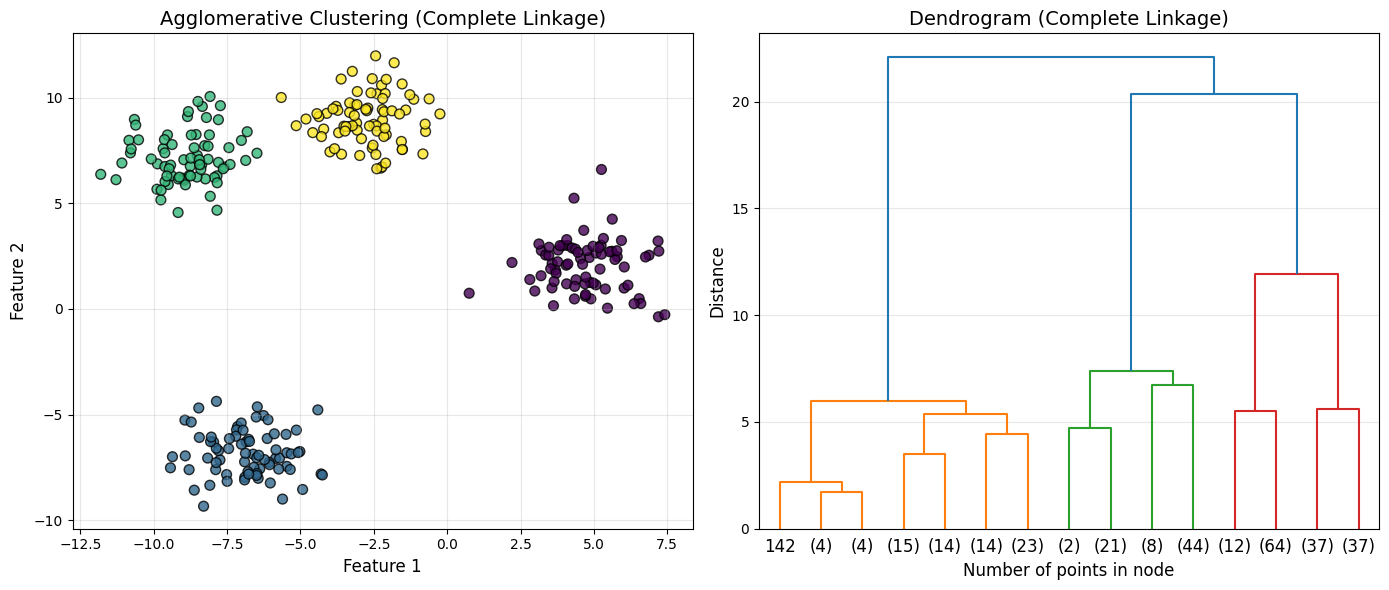

Cluster sizes:
[75 75 74 76]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage # Import linkage

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate synthetic data
X, y_true = make_blobs(n_samples=300,
                       centers=4,
                       cluster_std=1.2,
                       random_state=42)

# 2. Apply Agglomerative Clustering with complete linkage
agg_clustering = AgglomerativeClustering(n_clusters=4,
                                        linkage='complete')
y_pred = agg_clustering.fit_predict(X)

# 3. Plot the clustering results
plt.figure(figsize=(14, 6))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis',
            s=50, alpha=0.8, edgecolor='k')
plt.title('Agglomerative Clustering (Complete Linkage)', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(alpha=0.3)

# 4. Create dendrogram (optional visualization)
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix using linkage function (instead of model.distances_)
    linkage_matrix = linkage(X, method=model.linkage, metric='euclidean')

    # Plot the dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.subplot(1, 2, 2)
plot_dendrogram(agg_clustering, truncate_mode='level', p=3)
plt.title('Dendrogram (Complete Linkage)', fontsize=14)
plt.xlabel('Number of points in node', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print cluster sizes
print("Cluster sizes:")
print(np.bincount(y_pred))

# 34.  Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.

<ipython-input-15-62de34202bf4>:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


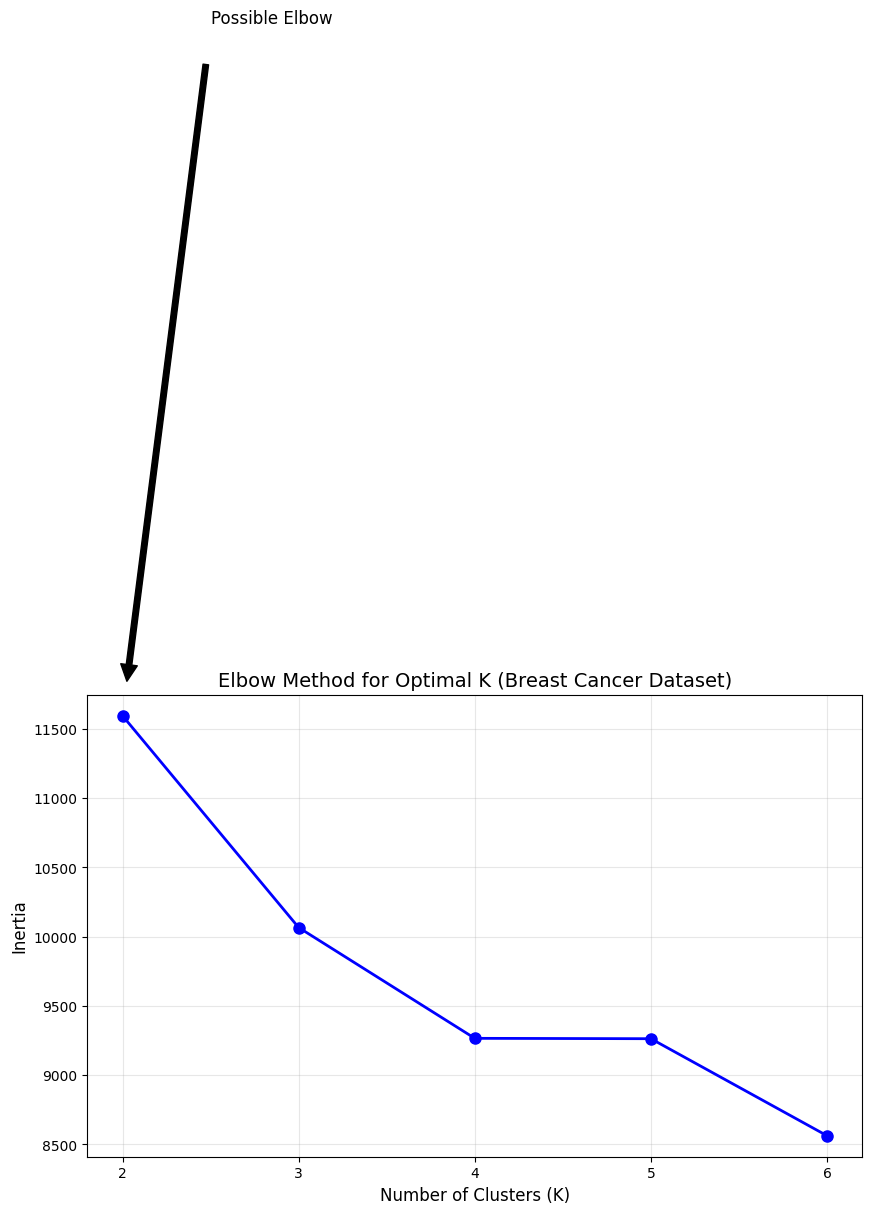

Inertia values:
K = 2: 11595.68
K = 3: 10066.28
K = 4: 9266.15
K = 5: 9263.40
K = 6: 8562.88


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and prepare the dataset
data = load_breast_cancer()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Range of K values to test
k_values = range(2, 7)
inertias = []

# Compute inertia for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal K (Breast Cancer Dataset)', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(k_values)
plt.grid(True, alpha=0.3)

# Highlight the "elbow" point (typically K=2 for this binary classification dataset)
plt.annotate('Possible Elbow',
             xy=(2, inertias[0]),
             xytext=(2.5, inertias[0] + 5000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.tight_layout()
plt.show()

# Print the inertia values
print("Inertia values:")
for k, inertia in zip(k_values, inertias):
    print(f"K = {k}: {inertia:.2f}")

# 35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.

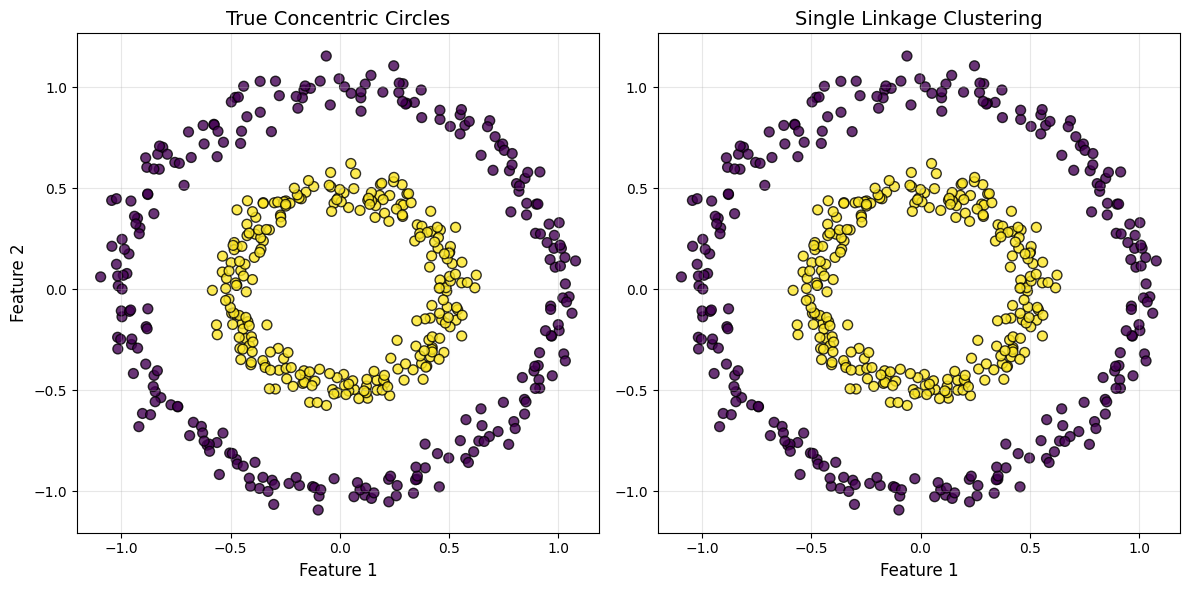

Adjusted Rand Index: 1.000


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate concentric circles
X, y_true = make_circles(n_samples=500,
                         noise=0.05,
                         factor=0.5,  # Distance between circles
                         random_state=42)

# 2. Apply Agglomerative Clustering with single linkage
single_linkage = AgglomerativeClustering(n_clusters=2,
                                        linkage='single')
y_pred = single_linkage.fit_predict(X)

# 3. Visualize the results
plt.figure(figsize=(12, 6))

# Plot true clusters (for reference)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis',
            s=50, alpha=0.8, edgecolor='k')
plt.title('True Concentric Circles', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(alpha=0.3)

# Plot predicted clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis',
            s=50, alpha=0.8, edgecolor='k')
plt.title('Single Linkage Clustering', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print clustering accuracy
from sklearn.metrics import adjusted_rand_score
print(f"Adjusted Rand Index: {adjusted_rand_score(y_true, y_pred):.3f}")

# 36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise ).

In [17]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X = wine.data
feature_names = wine.feature_names

# Scale the data (crucial for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)  # Parameters may need tuning
clusters = dbscan.fit_predict(X_scaled)

# Count clusters (excluding noise)
unique_clusters = np.unique(clusters)
n_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)
n_noise = np.sum(clusters == -1)

# Print results
print("DBSCAN Results:")
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"Cluster distribution: {np.bincount(clusters[clusters != -1])}")

# Optional: Compare with actual wine classes
print("\nActual wine class distribution:")
print(np.bincount(wine.target))

DBSCAN Results:
Number of clusters found: 0
Number of noise points: 178
Cluster distribution: []

Actual wine class distribution:
[59 71 48]


# 37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.

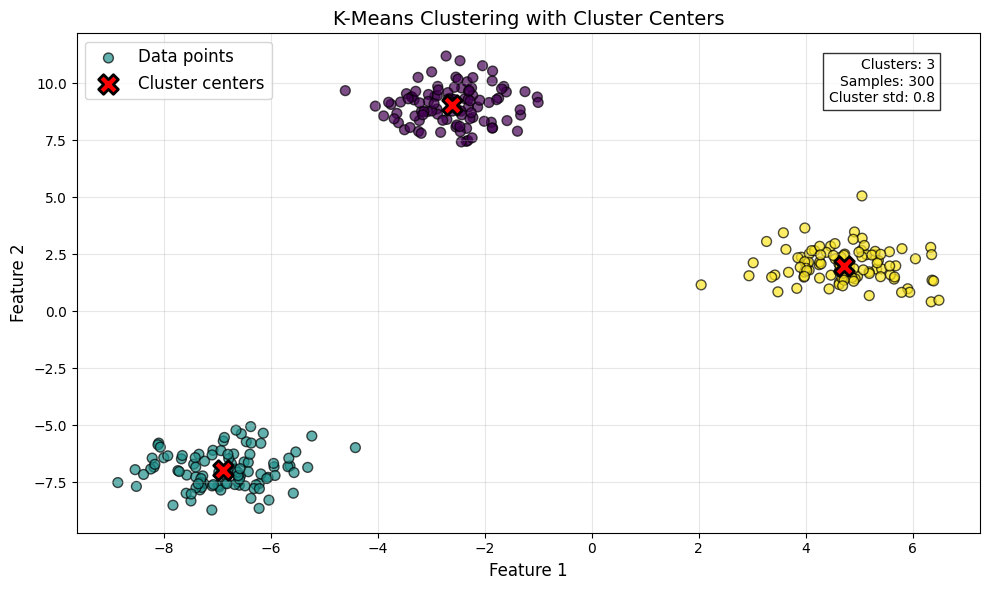

Cluster sizes:
[100 100 100]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate synthetic data with 3 clusters
X, y = make_blobs(n_samples=300,
                  centers=3,
                  cluster_std=0.8,
                  random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
centroids = kmeans.cluster_centers_

# 3. Create the visualization
plt.figure(figsize=(10, 6))

# Plot data points colored by cluster assignment
plt.scatter(X[:, 0], X[:, 1], c=y_pred,
            cmap='viridis', s=50, alpha=0.7,
            edgecolor='k', label='Data points')

# Plot cluster centers
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', marker='X', s=200,
            linewidths=2, edgecolor='k',
            label='Cluster centers')

# Add labels and title
plt.title('K-Means Clustering with Cluster Centers', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Add text box with parameters
textstr = '\n'.join((
    f'Clusters: 3',
    f'Samples: 300',
    f'Cluster std: 0.8'))
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
         ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print cluster sizes
print("Cluster sizes:")
print(np.bincount(y_pred))

# 38.  Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

In [19]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Parameters may need tuning
clusters = dbscan.fit_predict(X_scaled)

# Count noise points (labeled as -1)
n_noise = list(clusters).count(-1)

# Print results
print(f"Number of noise points identified: {n_noise}")
print(f"Cluster distribution (excluding noise): {np.bincount(clusters[clusters != -1])}")
print(f"Total samples: {len(X)}")

# Optional: Compare with actual species
print("\nActual species distribution:")
print(np.bincount(iris.target))

Number of noise points identified: 34
Cluster distribution (excluding noise): [45 71]
Total samples: 150

Actual species distribution:
[50 50 50]


# 39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.

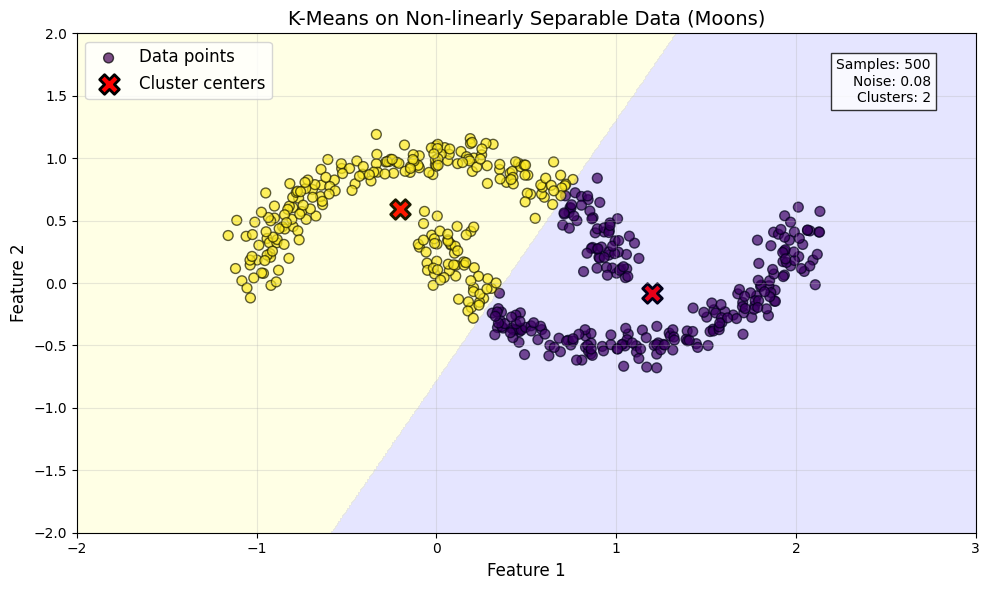

Adjusted Rand Index: 0.265


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate moon-shaped data (non-linearly separable)
X, y_true = make_moons(n_samples=500, noise=0.08, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# 3. Create the visualization
plt.figure(figsize=(10, 6))

# Plot data points colored by cluster assignment
plt.scatter(X[:, 0], X[:, 1], c=y_pred,
            cmap='viridis', s=50, alpha=0.7,
            edgecolor='k', label='Data points')

# Plot cluster centers
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', marker='X', s=200,
            linewidths=2, edgecolor='k',
            label='Cluster centers')

# Add decision boundary (Voronoi cells)
xx, yy = np.meshgrid(np.linspace(-2, 3, 500),
                     np.linspace(-2, 2, 500))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.1, levels=[-0.5, 0.5, 1.5],
             colors=['blue', 'yellow'])

# Add labels and title
plt.title('K-Means on Non-linearly Separable Data (Moons)', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Add text box with parameters
textstr = '\n'.join((
    f'Samples: 500',
    f'Noise: 0.08',
    f'Clusters: 2'))
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
         ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print clustering accuracy (for reference)
from sklearn.metrics import adjusted_rand_score
print(f"Adjusted Rand Index: {adjusted_rand_score(y_true, y_pred):.3f}")

# 40.  Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

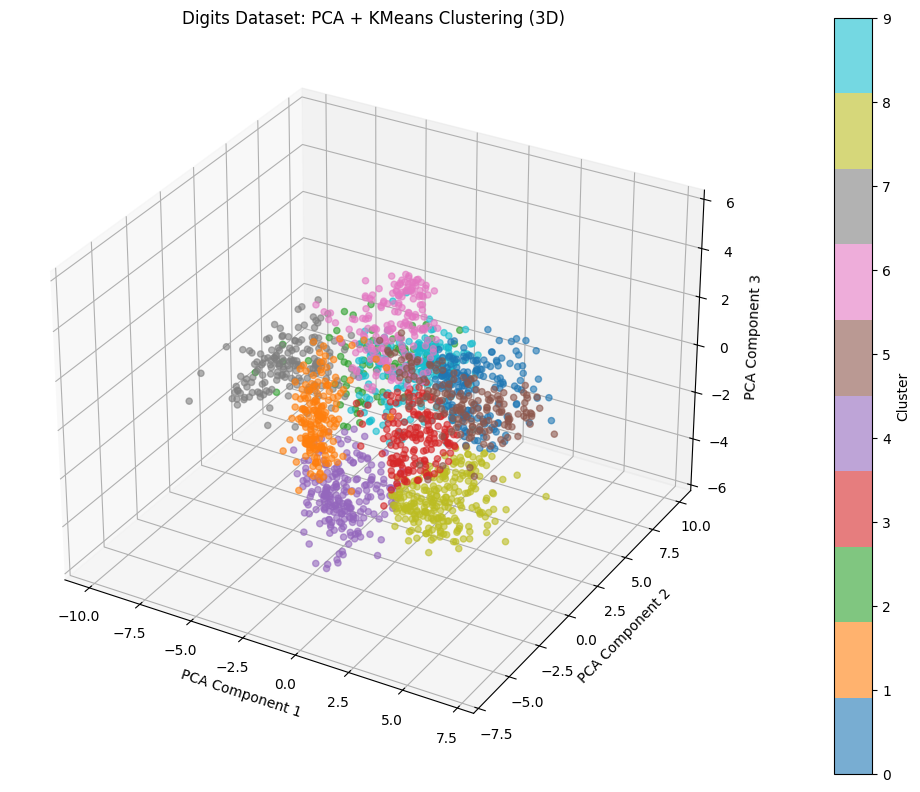

Explained variance ratio: [0.12033916 0.09561054 0.08444415]
Total explained variance: 0.3003938539345733


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on cluster assignments
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                    c=clusters, cmap='tab10', s=20, alpha=0.6)

# Add color bar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster')

# Set labels
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Digits Dataset: PCA + KMeans Clustering (3D)')

plt.tight_layout()
plt.show()

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

# 41.  Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.

Silhouette Score for 5 clusters: 0.681


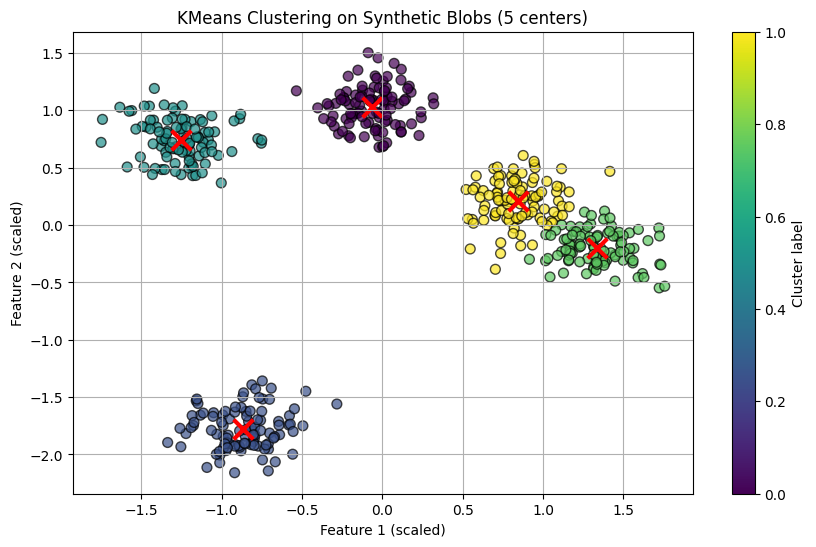

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic blobs with 5 centers
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1.0,
                  random_state=42)

# Standardize the data (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for 5 clusters: {silhouette_avg:.3f}")

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot the clustered data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
            c=cluster_labels, cmap='viridis',
            s=50, alpha=0.7, edgecolor='k')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            c='red', marker='x', s=200, linewidth=3)

plt.title('KMeans Clustering on Synthetic Blobs (5 centers)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(label='Cluster label')
plt.grid(True)
plt.show()

# 42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.Visualize in 2D

Silhouette Score: 0.505
Explained variance ratio: [0.44272026 0.18971182]


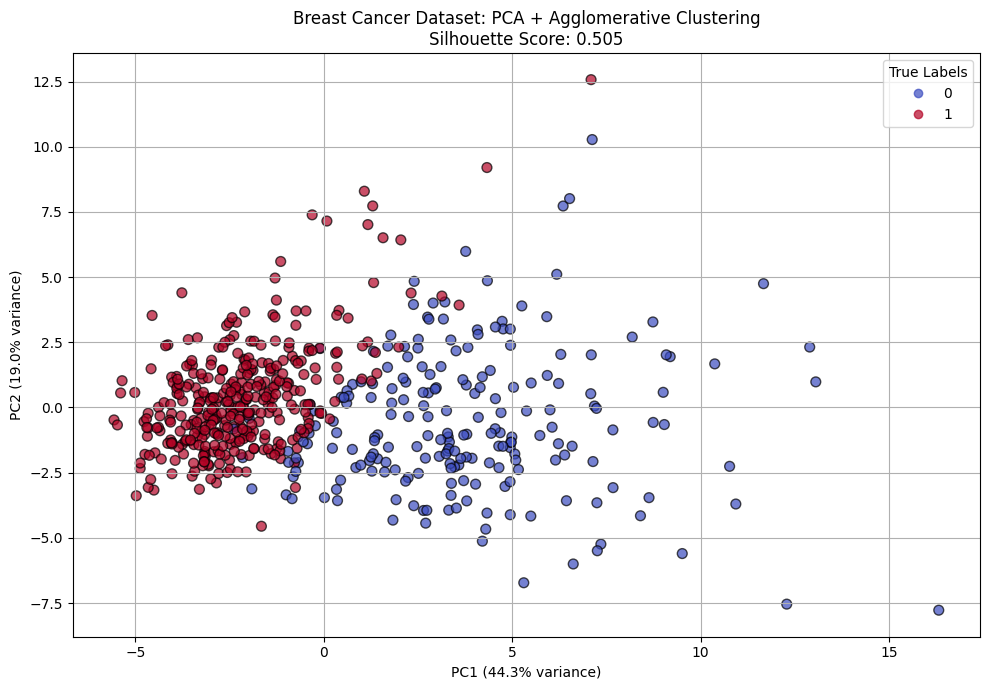

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels = agg_cluster.fit_predict(X_pca)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Create the visualization
plt.figure(figsize=(10, 7))

# Scatter plot with true labels (malignant/benign)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=y, cmap='coolwarm',
                     s=50, alpha=0.7, edgecolor='k')

# Add legend and labels
plt.legend(*scatter.legend_elements(), title='True Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Breast Cancer Dataset: PCA + Agglomerative Clustering\n'
         f"Silhouette Score: {silhouette_avg:.3f}")
plt.grid(True)

# Add explained variance to axis labels
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")

plt.tight_layout()
plt.show()

# 43.  Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.

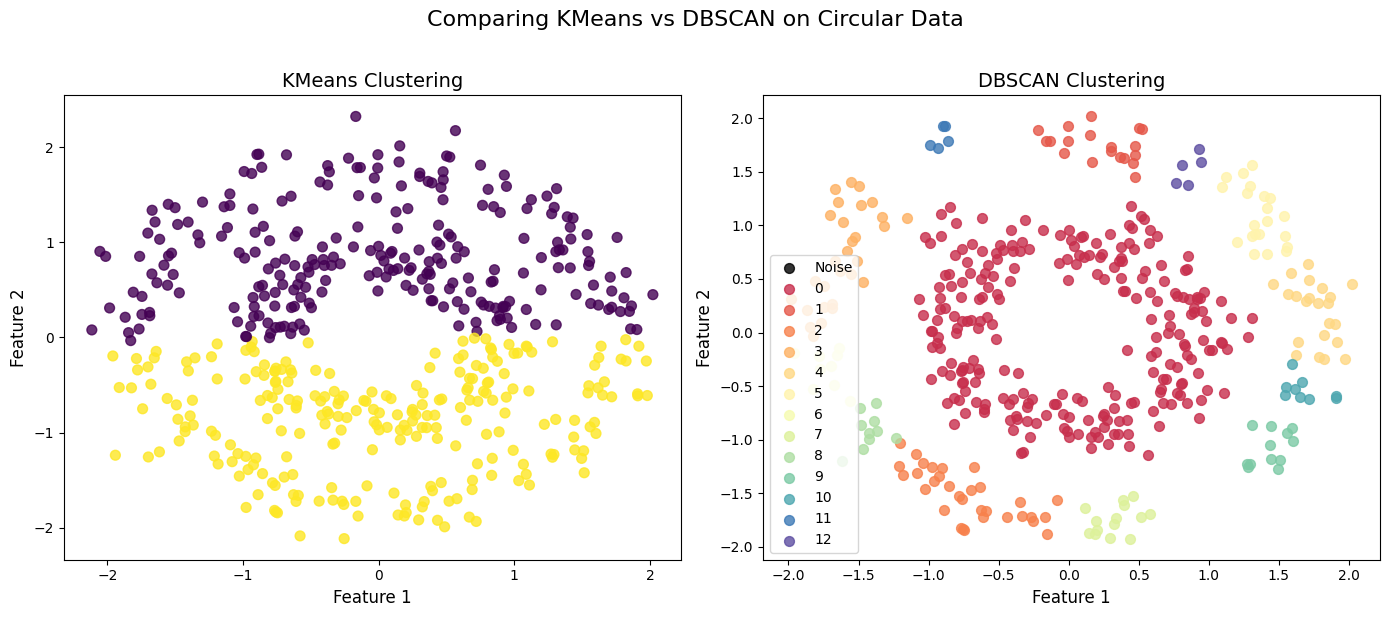

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate noisy circular data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.1, random_state=42)
X = StandardScaler().fit_transform(X)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X)
ax1.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.8)
ax1.set_title('KMeans Clustering', fontsize=14)
ax1.set_xlabel('Feature 1', fontsize=12)
ax1.set_ylabel('Feature 2', fontsize=12)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Black used for noise
        color = 'k'
        label = 'Noise'
    class_member_mask = (dbscan_labels == label)
    xy = X[class_member_mask]
    ax2.scatter(xy[:, 0], xy[:, 1], c=[color], label=label, s=50, alpha=0.8)

ax2.set_title('DBSCAN Clustering', fontsize=14)
ax2.set_xlabel('Feature 1', fontsize=12)
ax2.set_ylabel('Feature 2', fontsize=12)
ax2.legend()

# Add overall title
plt.suptitle('Comparing KMeans vs DBSCAN on Circular Data', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

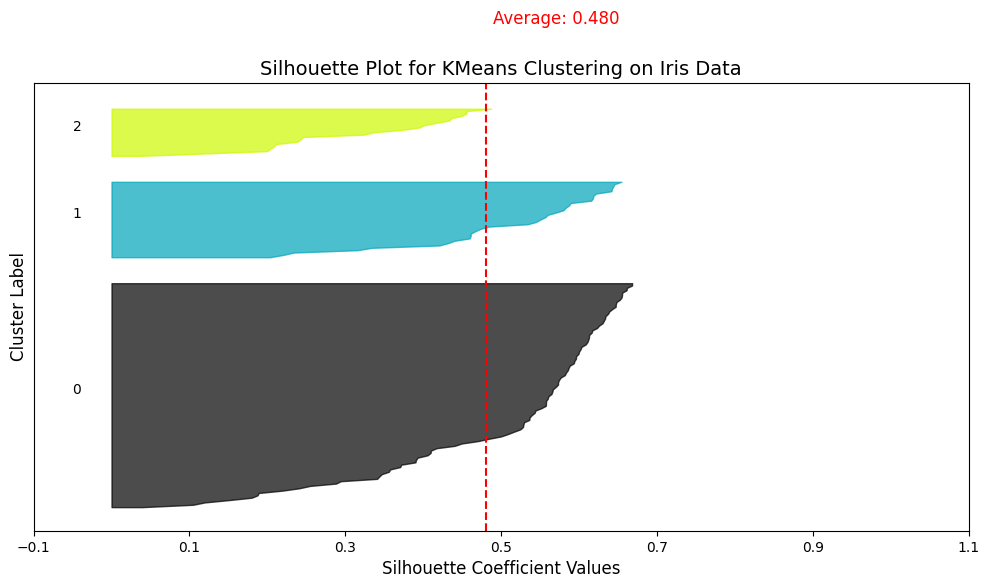

Average Silhouette Score for 3 clusters: 0.480


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_scaled)

# Compute silhouette scores
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Create visualization
plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("Silhouette Plot for KMeans Clustering on Iris Data", fontsize=14)
plt.xlabel("Silhouette Coefficient Values", fontsize=12)
plt.ylabel("Cluster Label", fontsize=12)

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.text(silhouette_avg + 0.01, y_lower + 25, f"Average: {silhouette_avg:.3f}",
         color="red", fontsize=12)

# The silhouette coefficient can range from -1 to 1
plt.xlim([-0.1, 1])
# Add some space between the plots and the y-axis
plt.ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks(np.arange(-0.1, 1.1, 0.2))

plt.tight_layout()
plt.show()

# Print the average silhouette score
print(f"Average Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}")

# 45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.

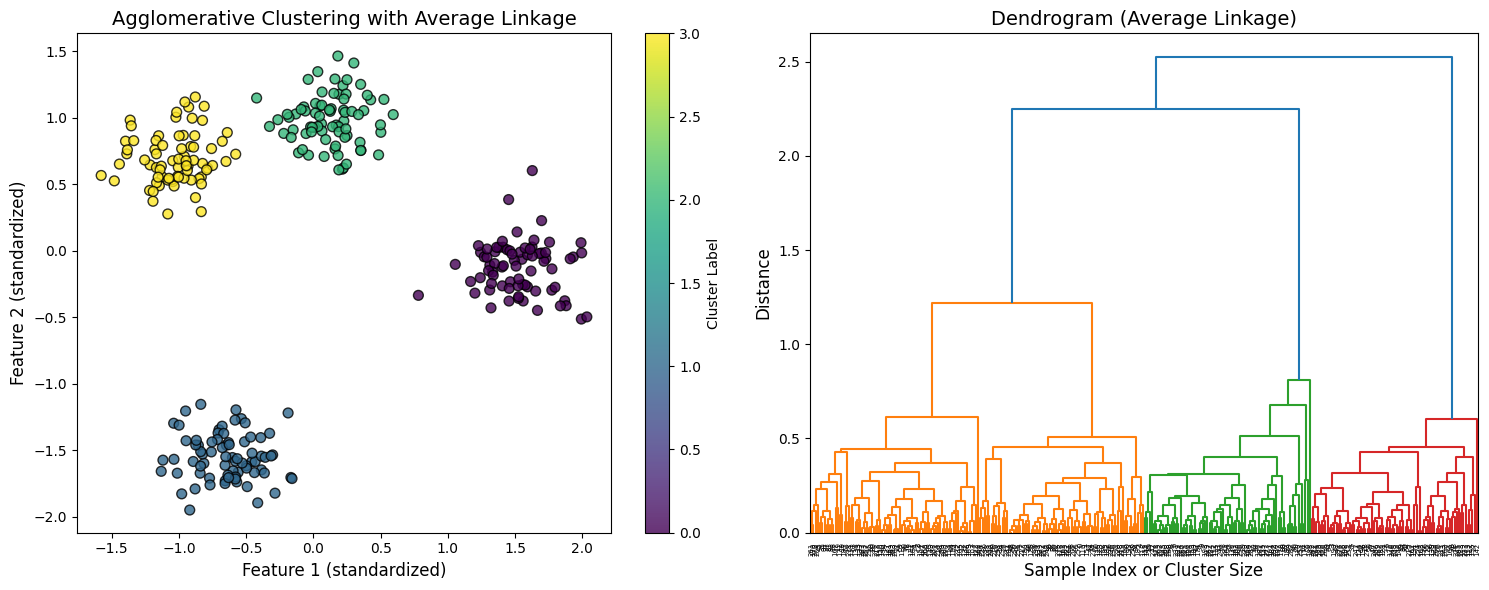

Number of clusters: 4
Number of points in each cluster: [ 0 75 75 76 74]


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
X, y = make_blobs(n_samples=300,
                  centers=4,
                  cluster_std=1.2,
                  random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Agglomerative Clustering with average linkage
agg_cluster = AgglomerativeClustering(n_clusters=4,
                                     linkage='average',
                                     metric='euclidean')
cluster_labels = agg_cluster.fit_predict(X_scaled)

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Subplot 1: Cluster visualization
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
                     c=cluster_labels, cmap='viridis',
                     s=50, alpha=0.8, edgecolor='k')
plt.title('Agglomerative Clustering with Average Linkage', fontsize=14)
plt.xlabel('Feature 1 (standardized)', fontsize=12)
plt.ylabel('Feature 2 (standardized)', fontsize=12)
plt.colorbar(scatter, label='Cluster Label')

# Subplot 2: Dendrogram
plt.subplot(1, 2, 2)
linked = linkage(X_scaled, 'average')  # Create linkage matrix
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram (Average Linkage)', fontsize=14)
plt.xlabel('Sample Index or Cluster Size', fontsize=12)
plt.ylabel('Distance', fontsize=12)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Number of clusters: {len(np.unique(cluster_labels))}")
print(f"Number of points in each cluster: {np.bincount(cluster_labels + 1)}")